In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Hypothesis Testing #

A test that chooses between two views of how data were generated.

Review the models we've seen so far: </br>
* Talledega County Jury: What were the hypotheses?
* Mendel's flowers: What were the hypotheses?
* Alameda Jury: What were the hypotheses?

Each model has two hypotheses:</br>
Null Hypothesis:

Alternative Hypothesis: 

The statitician chooses a statistic to test the hypotheses: </br>
Test Statistic: 
* Talledega County Jury: What was the test statistic?
* Mendel's flowers: What was the test statistic?
* Alameda Jury: What was the test statistic?

The model is run as a simulation many times assuming the null is true. 

Language of Hypothesis Tests:</br>
If data is not consistent with the null:

If data is consistent with the null:

We will not say

## The GSI's Defense ##

The students of one of the TA's at Berkeley  averaged a lower score than the the cohorts of the other TA's.
The TA said it was by chance. We can run statistical anaysis to see if that's true. 

What are the two hypotheses?

What might be a good test statistic for this test?

In [3]:
#The scores of all the students on the midterm 
#and which GSI they were assigned to.
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [4]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [5]:
# Which group seems to be significantly different?

scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [14]:
# assign the lowest average to this variable.
# Complete the code
observed_average = 13.6667
observed_average

13.6667

In [6]:
random_sample = scores.sample(27, with_replacement=False)
random_sample

Section,Midterm
5,25
3,9
5,10
2,16
3,22
11,24
5,7
1,20
9,17
4,21


In [7]:
np.average(random_sample.column('Midterm'))

16.0

In [15]:
# Simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class

def random_sample_midterm_avg():
    random_sample = scores.sample(27, with_replacement = False)
    return np.average(random_sample.column('Midterm'))

In [16]:
# Simulate 50,000 copies of the test statistic
# Complete the code.
sample_averages = make_array()

for i in np.arange(50000):
    sample_averages = np.append(sample_averages, random_sample_midterm_avg())    

## Our Decision

Simulate the test statistic under the null hypothesis; draw the histogram of the simulated values.</br>
This displays the empirical distribution of the statistic under the null hypothesis and shows the likely values.

Is the data consistent or not? What is inconsistent?

Inconsistent with the null: The observed statistic is located ...


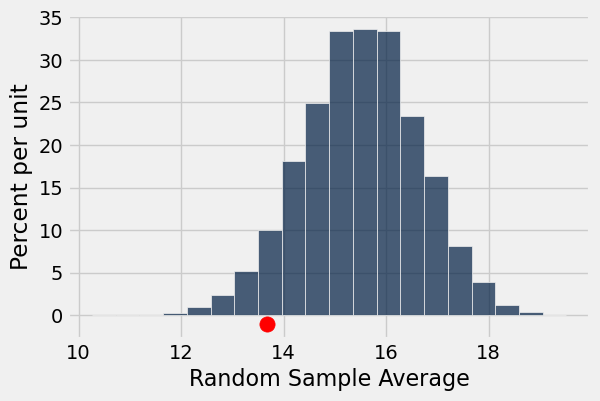

In [17]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic
averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
plots.scatter(observed_average, -0.01, color='red', s=120);

### P-Value
Formal name: observed significance level</br>
The P-value is the chance under the null hypothesis that the test statistic is equal to the value that was observed in the data or is even further in the direction of the alternative. (P-value: probability value)

The observed statistic being "In the Tail" as an area. (Probability of a continuous variable is given as the area under the curve from the value on.)

Statistically Significant:

Highly Statistically Significant:


#### Approach 1

In [18]:
# (1) Calculate the p-value: simulation area beyond observed value.
# How many times ? divided by the number of trials.
np.count_nonzero(sample_averages <= observed_average) / 50000
# (2) See if this is less than 5%

0.057639999999999997

#### Approach 2

In [19]:
# (1) Find simulated value corresponding to 5% of 50,000 = 2500
five_percent_point = averages_tbl.sort(0).column(0).item(2500)
five_percent_point

13.592592592592593

In [20]:
# (2) See if this value is greater than observed value
observed_average

13.6667

### Visual Representation

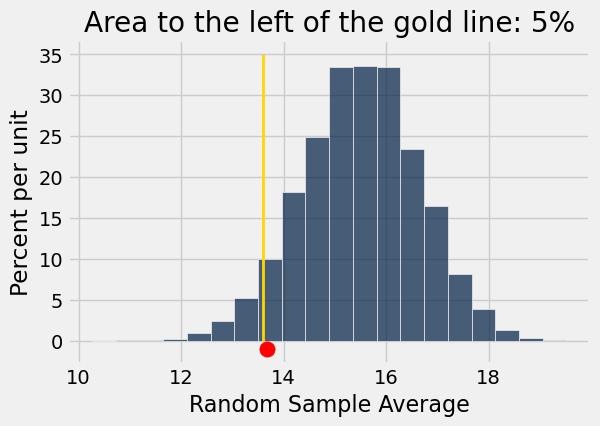

In [21]:
#Create a histogram with 20 bins from the data.

averages_tbl.hist(bins = 20)

#This code will plot the observed avereage and a cutoff line for 5%.
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plots.title('Area to the left of the gold line: 5%');
plots.scatter(observed_average, -0.01, color='red', s=120);

### Is the GSI's claim that the average being low was by chance statistically true?
Insert a markdown cell below to answer the question. 
